In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Unión de los datos (train y validation)

In [7]:
trainfiles_route = os.path.join(os.pardir, 'preprocessing_airpollution_data/entrenamiento_datos_por_estacion_sin_NaN')
testfiles_route = '..\\preprocessing_airpollution_data/prueba_datos_por_estacion_sin_NaN'
archivos = os.listdir(trainfiles_route)
archivos = ["PED.csv"]
# Acceder a cada archivo CSV
for archivo in archivos:
    train_dirfile = os.path.join(trainfiles_route, archivo)
    station_name = archivo.replace(".csv","")
    print(station_name)
    df_train = pd.read_csv(train_dirfile)
    test_dirfile = os.path.join(testfiles_route, station_name+".csv")
    df_test = pd.read_csv(test_dirfile)
df = pd.concat([df_train, df_test], axis = 0)
print(len(df), len(df_train), len(df_test))

PED
51209 46072 5137


In [8]:
columnas_especificas = ['CO', 'NO', 'NOX', 'NO2', 'O3', 'PM10', 'PM25', 'RH', 'SO2', 'TMP', 'WDR', 'WSP']
df_variables = df[columnas_especificas]
"""
# Obtener los valores mínimos de cada columna
valores_minimos = df.min()
valores_maximos = df.max()
print("Valores mínimos de cada columna:")
print(valores_minimos)
print("\nValores máximos de cada columna:")
print(valores_maximos)
"""
# Cambio de unidades. Conversión de ppm a ppb
df_variables["CO"] = df_variables["CO"] * 1000
# Normalización
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_variables)
df_values = pd.DataFrame(df_normalized, columns=df_variables.columns)
df.reset_index(inplace=True, drop=True)
df[columnas_especificas] = df_values[columnas_especificas]
"""
valores_minimos = df.min()
valores_maximos = df.max()
print("Valores mínimos de cada columna:")
print(valores_minimos)
print("\nValores máximos de cada columna:")
print(valores_maximos)
"""
df.to_csv("PED_alldata_normalized.csv")
print(len(df))

C:\Users\valer\AppData\Local\Temp\ipykernel_29156\3846612663.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables["CO"] = df_variables["CO"] * 1000


51209


In [15]:
df

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,year,month,day,hour,minute
0,2011/07/01 00:00:00,0.449541,0.204633,0.232787,0.177570,0.000000,0.051075,0.055866,0.84,0.014493,0.483871,0.036111,0.197368,2011,7,1,0,0
1,2011/07/01 01:00:00,0.204893,0.007722,0.052459,0.140187,0.027933,0.010753,0.016760,0.95,0.007246,0.419355,0.708333,0.092105,2011,7,1,1,0
2,2011/07/01 02:00:00,0.204893,0.007722,0.039344,0.102804,0.033520,0.013441,0.022346,0.95,0.007246,0.419355,0.741667,0.052632,2011,7,1,2,0
3,2011/07/01 03:00:00,0.235474,0.015444,0.059016,0.140187,0.011173,0.010753,0.011173,0.95,0.007246,0.419355,0.888889,0.065789,2011,7,1,3,0
4,2011/07/01 04:00:00,0.204893,0.015444,0.062295,0.149533,0.016760,0.008065,0.011173,0.95,0.007246,0.419355,0.100000,0.105263,2011,7,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51204,2024/05/15 12:00:00,0.162080,0.007722,0.036066,0.102804,0.586592,0.137097,0.189944,0.25,0.021739,0.838710,0.105556,0.289474,2024,5,15,12,0
51205,2024/05/15 13:00:00,0.159021,0.003861,0.032787,0.093458,0.664804,0.120968,0.167598,0.22,0.021739,0.870968,0.008333,0.276316,2024,5,15,13,0
51206,2024/05/15 14:00:00,0.149847,0.003861,0.029508,0.084112,0.681564,0.145161,0.217877,0.21,0.021739,0.903226,0.113889,0.368421,2024,5,15,14,0
51207,2024/05/15 16:00:00,0.152905,0.007722,0.042623,0.112150,0.368715,0.185484,0.206704,0.38,0.014493,0.741935,0.563889,0.789474,2024,5,15,16,0


In [16]:
new_nameTrain = "PED_train_normalized.csv"
new_nameTest = "PED_test_normalized.csv"
#train_procentage = round(len(df)*.8)
#test_porcentage = round(len(df)*.05)
#train_set = df[0:train_procentage]
#val_set = df[train_procentage:train_procentage+validation_porcentage]
#test_set = df[train_procentage+validation_porcentage:len(df)]
df["date"] = df["date"].str.replace("-", "/")
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M:%S')
fecha_limite = pd.Timestamp('2023-04-01')
train_set = df[df['date'] < fecha_limite].copy()
test_set = df[df['date'] > fecha_limite].copy()
print(len(train_set),  len(test_set))
print(len(train_set)+ len(test_set))

46072 5137
51209


51209 31516 14556 5137

In [17]:
train_set.to_csv(new_nameTrain, index=False)
test_set.to_csv(new_nameTest, index=False)

# Gráficas

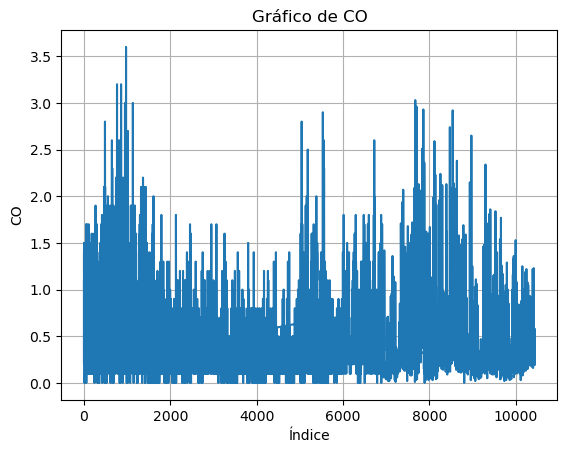

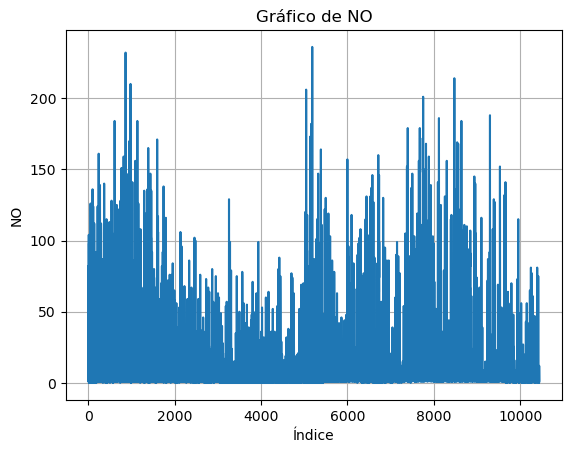

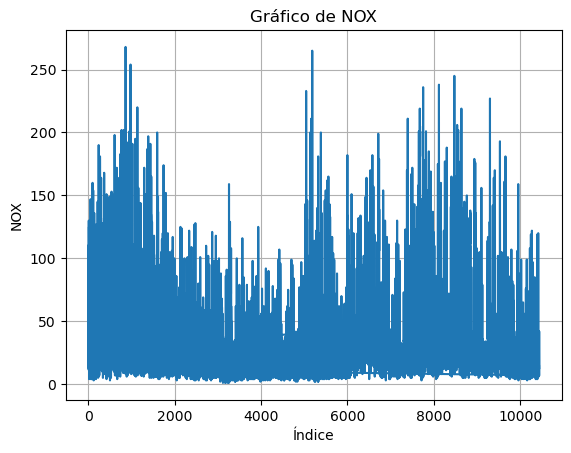

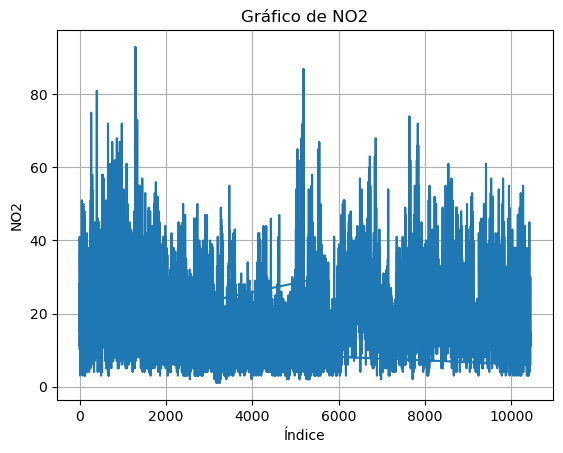

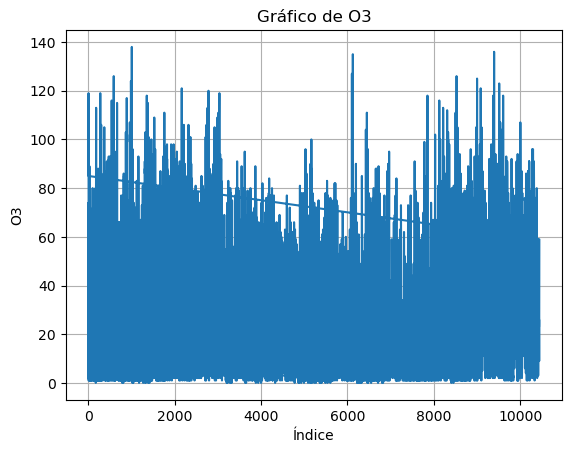

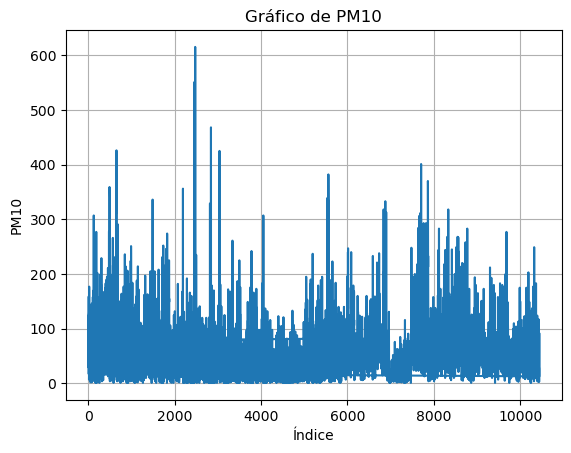

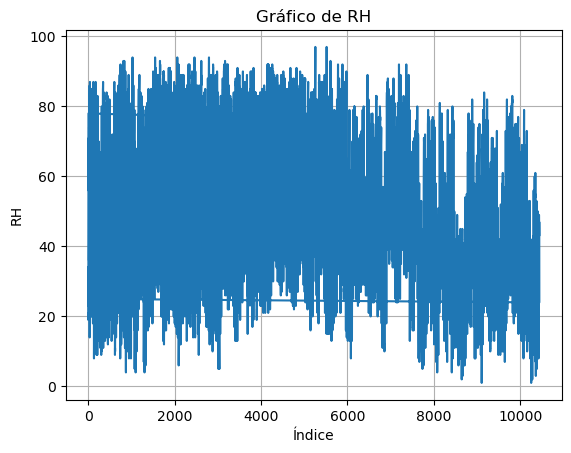

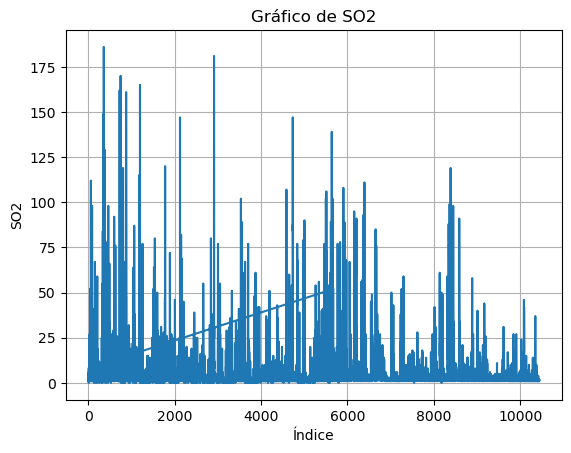

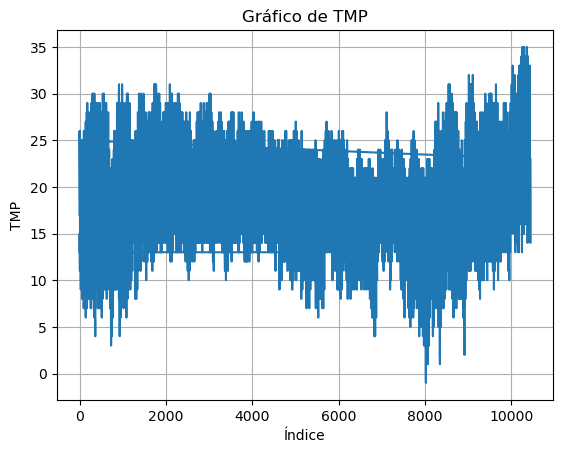

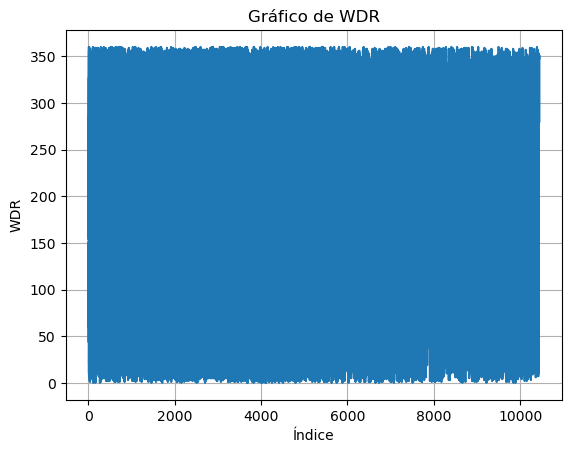

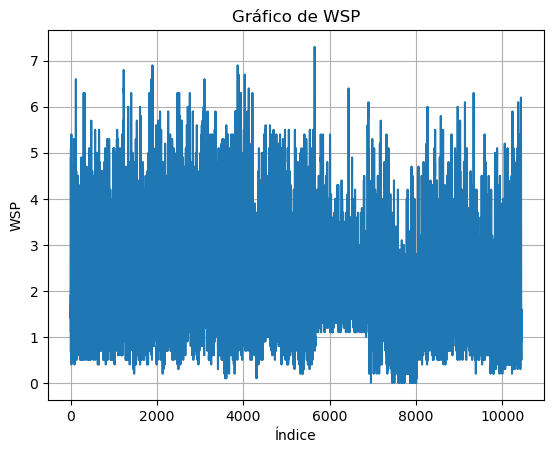

In [45]:
# Iterar sobre cada columna del DataFrame
for column in df.columns:
    plt.figure()  # Crear una nueva figura
    plt.plot(df[column])
    plt.title(f'Gráfico de {column}')
    plt.xlabel('Índice')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


# Gráficas 2

In [2]:
def graficar_valores(new_hours, values, variable):
  fechas = new_hours
  # Convertir las fechas a objetos datetime
  fechas_datetime = [datetime.strptime(fecha, '%Y/%m/%d %H:%M') for fecha in fechas]

  # Crear el gráfico
  plt.figure(figsize=(10, 6))

  # Graficar el target y las predicciones en el eje Y
  plt.plot(fechas_datetime, values, label=str(variable)+' value', marker='o')

  # Configurar formato de fecha en el eje X
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

  # Rotar las fechas para mayor legibilidad
  plt.gcf().autofmt_xdate()

  # Configurar etiquetas y título
  plt.xlabel('Fechas')
  plt.ylabel('Valor')
  plt.title(variable)

  # Mostrar la leyenda
  plt.legend()
  plt.grid(True)
  # Mostrar el gráfico
  plt.show()

In [45]:
dataset

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,year,month,day,hour,minute
1,2011/07/01 01:00,0.3,1.0,16.0,15.0,5.0,4.0,3.0,95.0,1.0,13.0,255.0,0.7,2011,7,1,1,0
2,2011/07/01 02:00,0.3,1.0,12.0,11.0,6.0,5.0,4.0,95.0,1.0,13.0,267.0,0.4,2011,7,1,2,0
3,2011/07/01 03:00,0.4,3.0,18.0,15.0,2.0,4.0,2.0,95.0,1.0,13.0,320.0,0.5,2011,7,1,3,0
4,2011/07/01 04:00,0.3,3.0,19.0,16.0,3.0,3.0,2.0,95.0,1.0,13.0,36.0,0.8,2011,7,1,4,0
5,2011/07/01 05:00,0.2,1.0,11.0,10.0,7.0,4.0,3.0,95.0,1.0,13.0,261.0,0.5,2011,7,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,2011/07/29 15:00,0.6,1.0,19.0,18.0,99.0,47.0,29.0,36.0,2.0,25.0,355.0,3.1,2011,7,29,15,0
642,2011/07/29 20:00,0.8,8.0,37.0,29.0,11.0,12.0,8.0,87.0,1.0,14.0,243.0,2.1,2011,7,29,20,0
643,2011/07/29 21:00,0.9,19.0,51.0,32.0,1.0,20.0,13.0,81.0,1.0,15.0,329.0,2.6,2011,7,29,21,0
644,2011/07/29 22:00,0.5,6.0,29.0,23.0,8.0,16.0,10.0,75.0,1.0,15.0,14.0,3.1,2011,7,29,22,0


In [46]:
df

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,year,month,day,hour,minute
0,2011/07/01 00:00,1.10,52.0,71.0,19.0,0.0,19.0,10.0,84.0,2.0,15.0,13.0,1.5,2011,7,1,0,0
1,2011/07/01 01:00,0.30,1.0,16.0,15.0,5.0,4.0,3.0,95.0,1.0,13.0,255.0,0.7,2011,7,1,1,0
2,2011/07/01 02:00,0.30,1.0,12.0,11.0,6.0,5.0,4.0,95.0,1.0,13.0,267.0,0.4,2011,7,1,2,0
3,2011/07/01 03:00,0.40,3.0,18.0,15.0,2.0,4.0,2.0,95.0,1.0,13.0,320.0,0.5,2011,7,1,3,0
4,2011/07/01 04:00,0.30,3.0,19.0,16.0,3.0,3.0,2.0,95.0,1.0,13.0,36.0,0.8,2011,7,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51204,2024/05/15 12:00,0.16,1.0,11.0,11.0,105.0,51.0,34.0,25.0,3.0,26.0,38.0,2.2,2024,5,15,12,0
51205,2024/05/15 13:00,0.15,0.0,10.0,10.0,119.0,45.0,30.0,22.0,3.0,27.0,3.0,2.1,2024,5,15,13,0
51206,2024/05/15 14:00,0.12,0.0,9.0,9.0,122.0,54.0,39.0,21.0,3.0,28.0,41.0,2.8,2024,5,15,14,0
51207,2024/05/15 16:00,0.13,1.0,13.0,12.0,66.0,69.0,37.0,38.0,2.0,23.0,203.0,6.0,2024,5,15,16,0


1 622 28


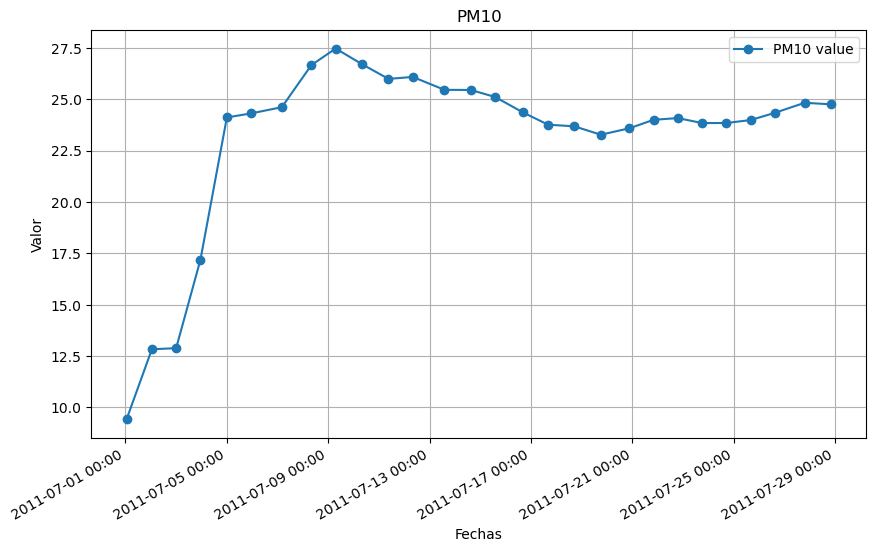

645 622 28


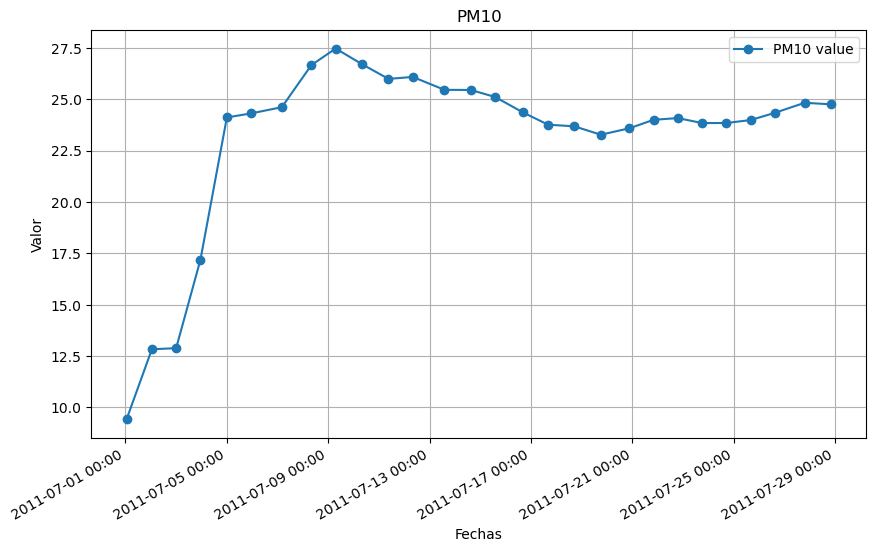

1289 622 28


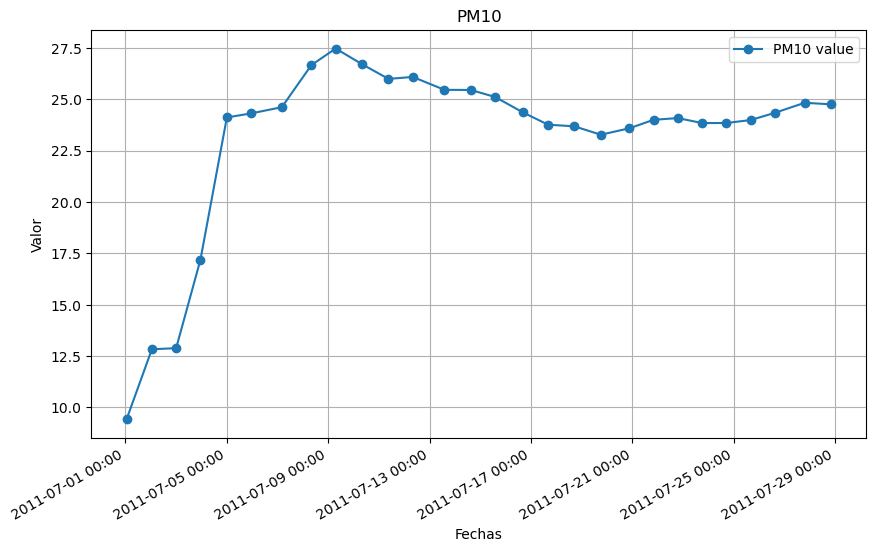

1933 622 28


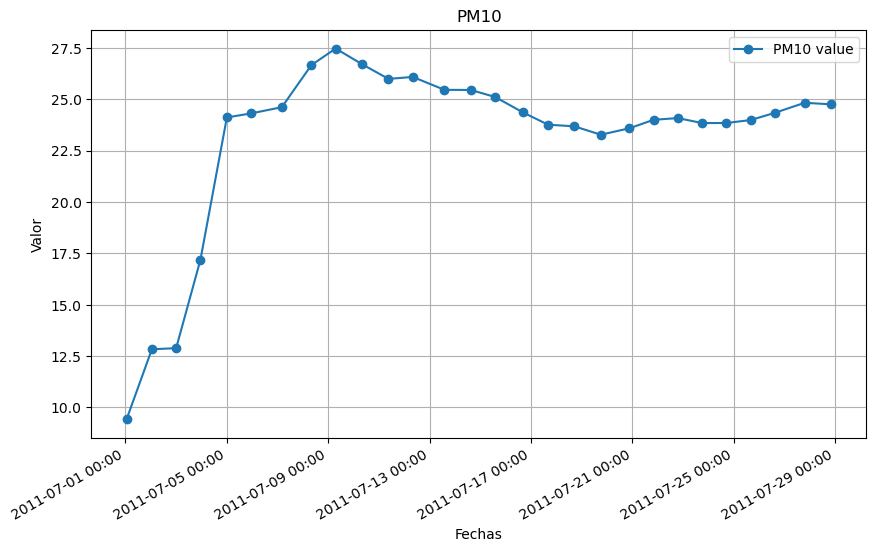

In [44]:
dir = "C:/Users/valer/Documents/CIC/doctorado/air_pollution/preprocessing_airpollution_data/datos_por_estacion_sin_NaN/PED.csv"
df = pd.read_csv(dir)
day_step = 23
dates = []
values = []
step_graph = 7*4*day_step
for j in range(1,4*step_graph, step_graph):
    for i in range(j,4*7*day_step,day_step):
        dataset = df[j:j+i+day_step]
        val = dataset.PM10.mean()
        date = df.iloc[i].date
        values.append(val)
        dates.append(date)
        
    print(j,i,len(values))
    graficar_valores(dates,values, "PM10")

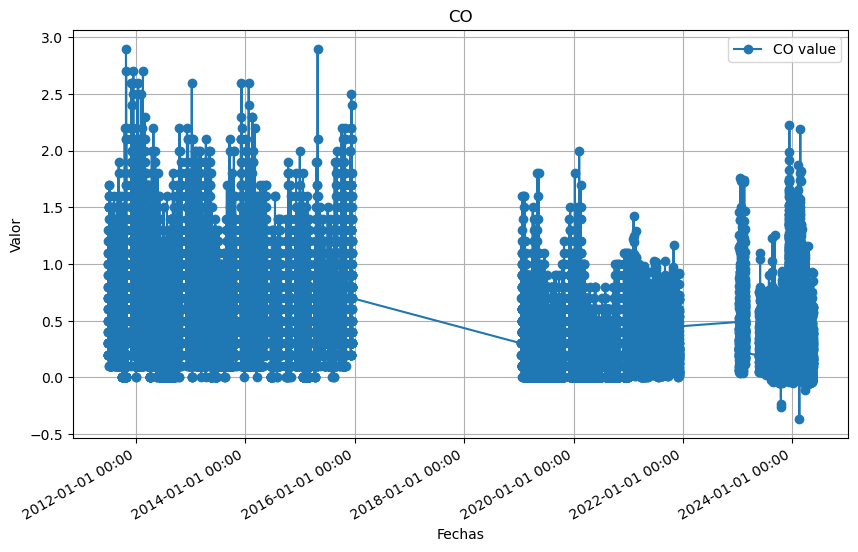

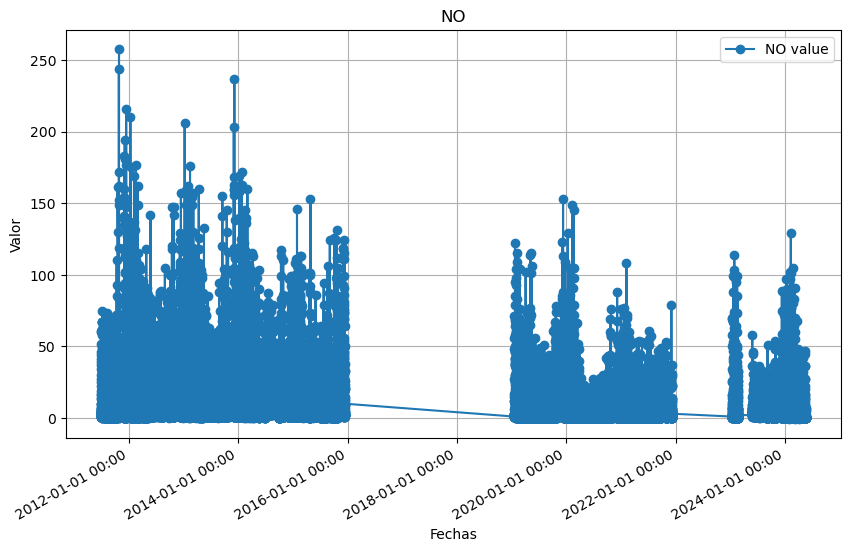

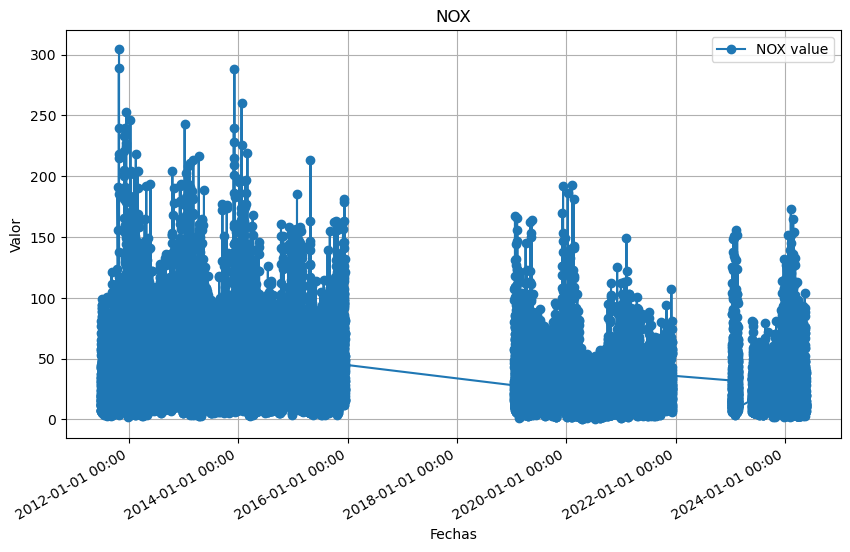

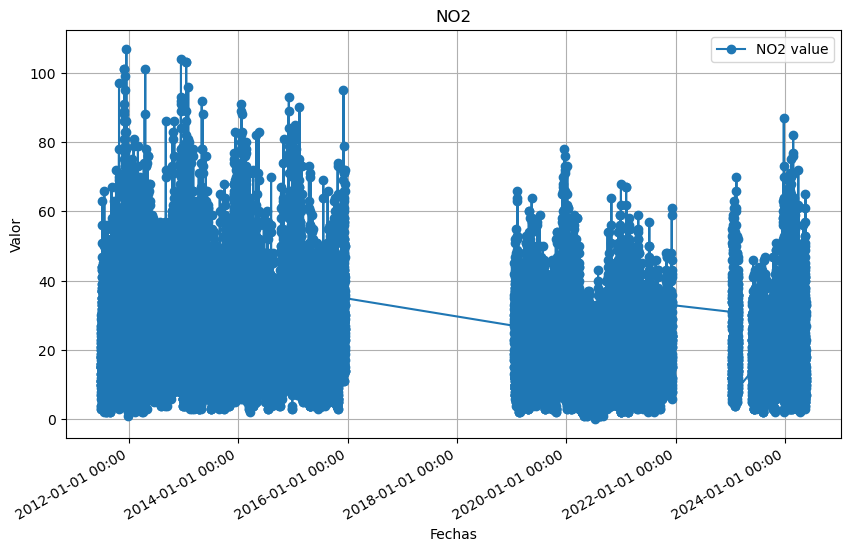

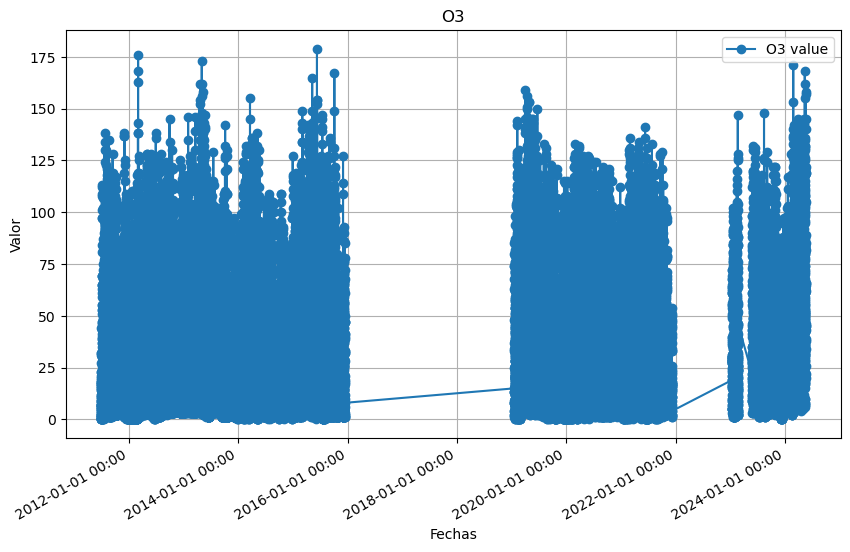

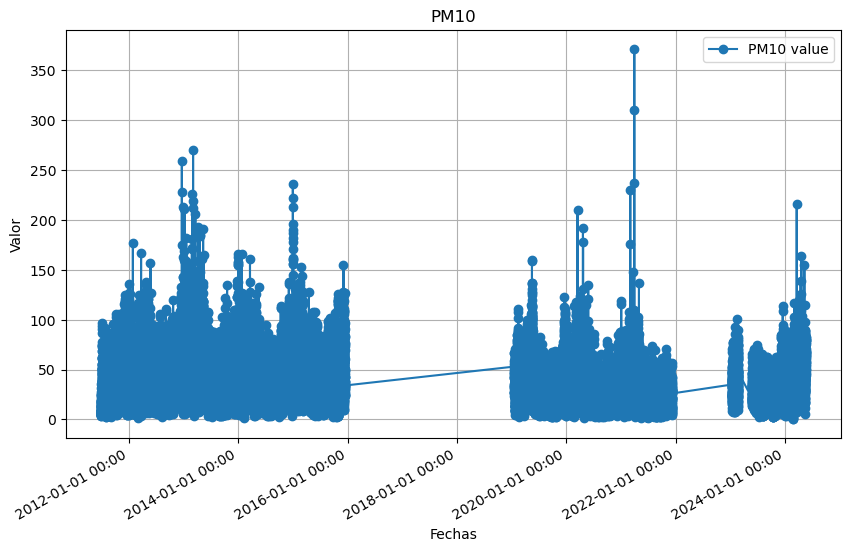

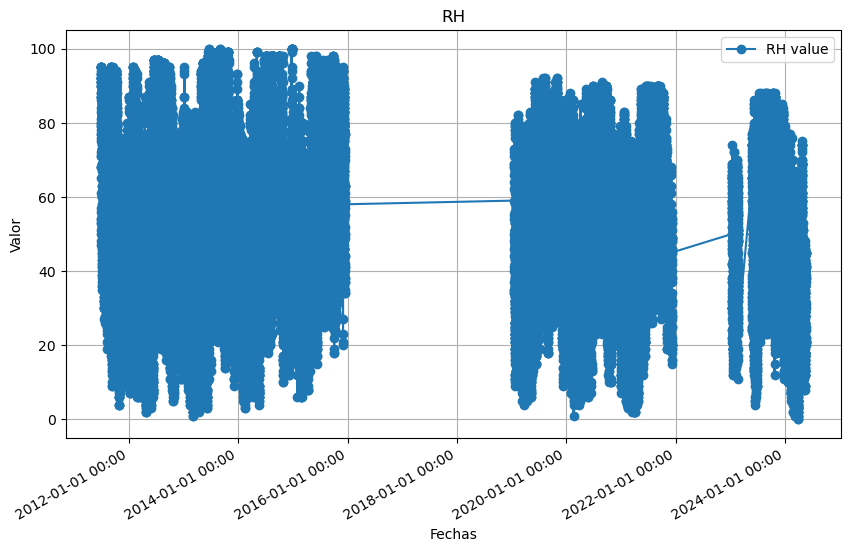

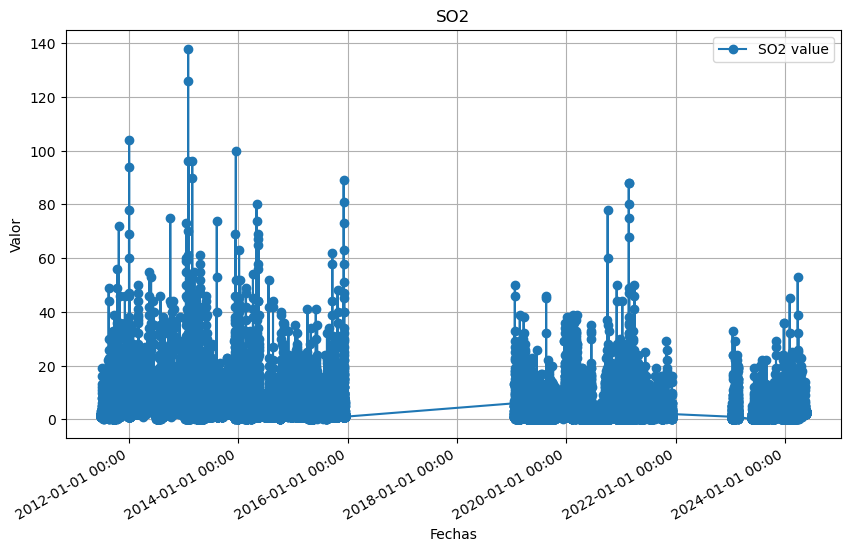

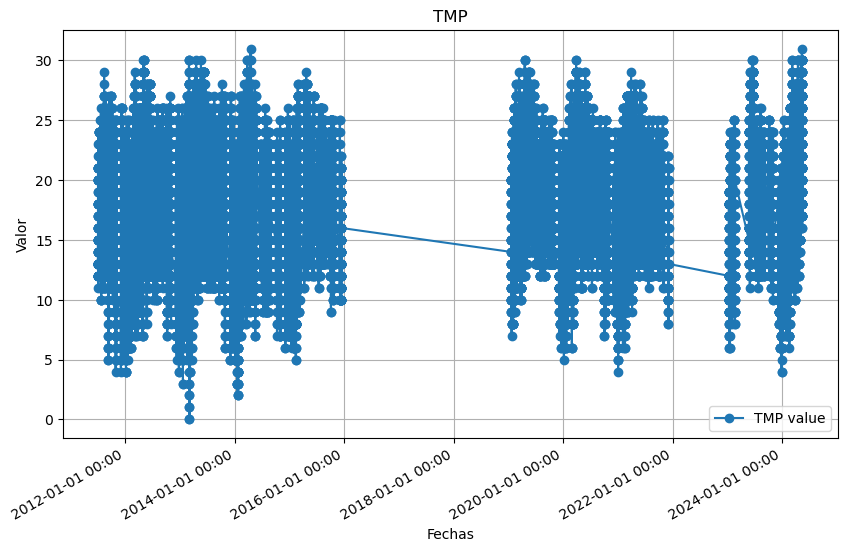

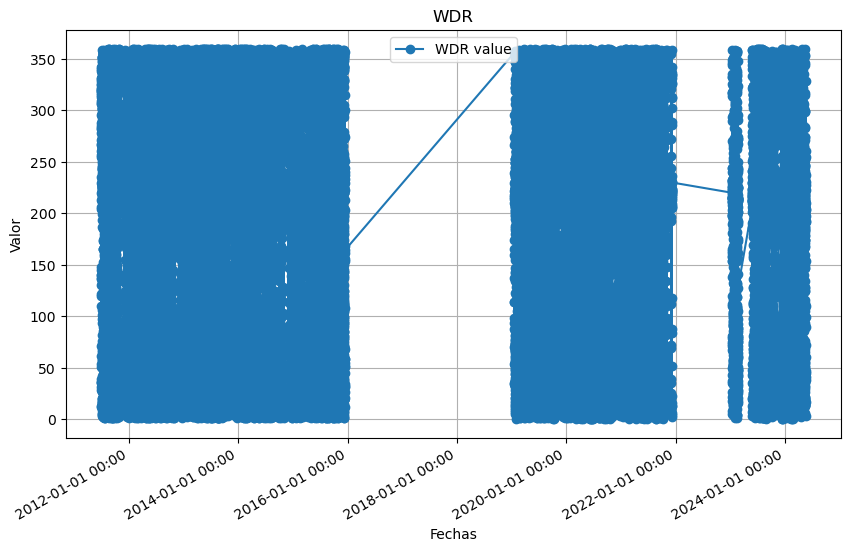

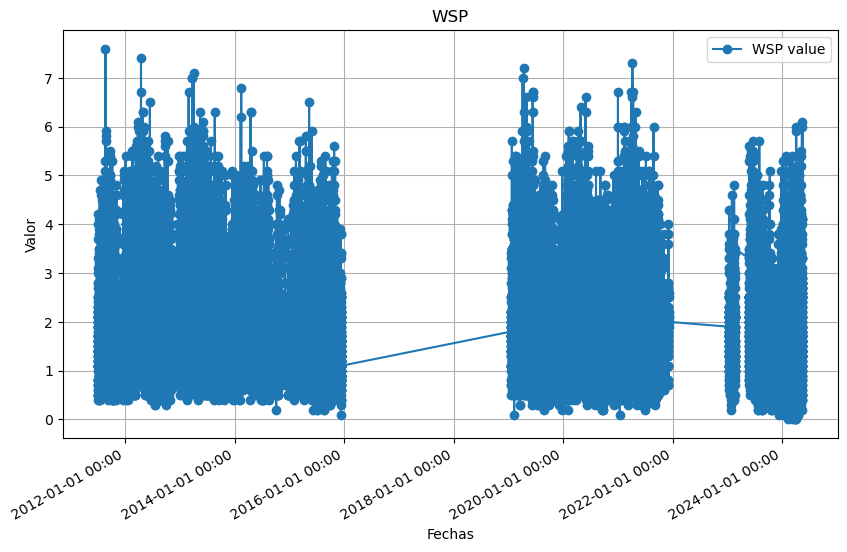

In [59]:
for variable in df_variables.columns:
    dates = df.date
    graficar_valores(dates,df_variables[variable], variable)

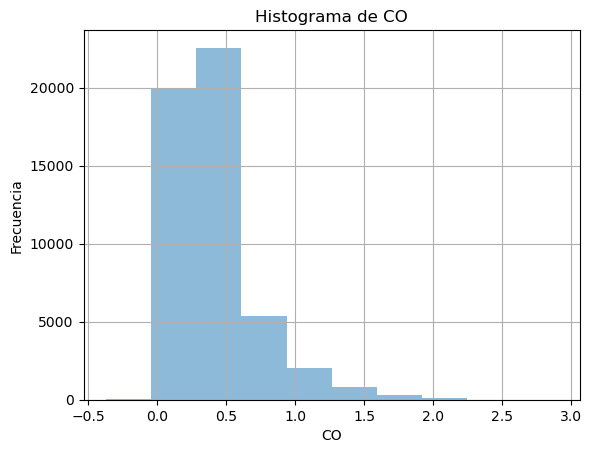

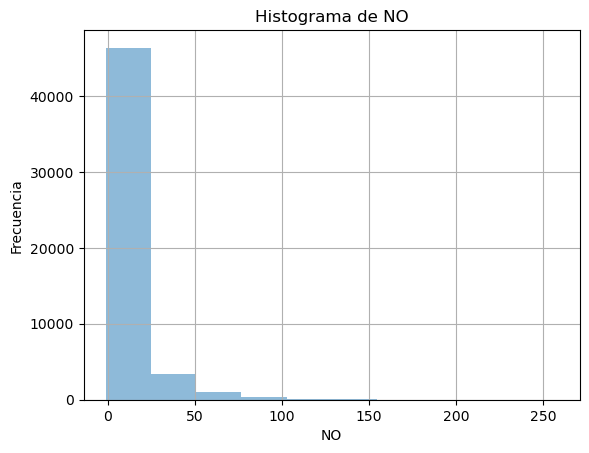

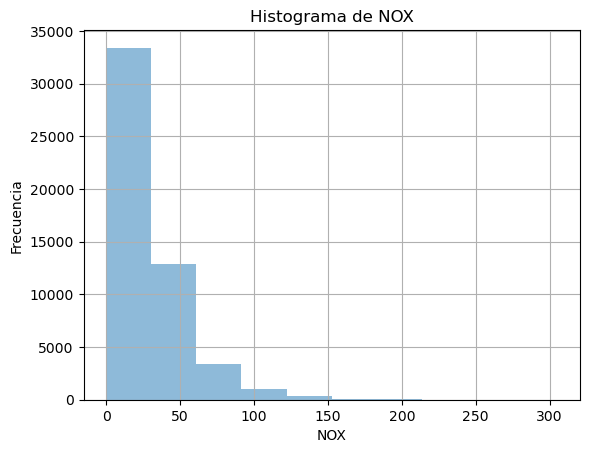

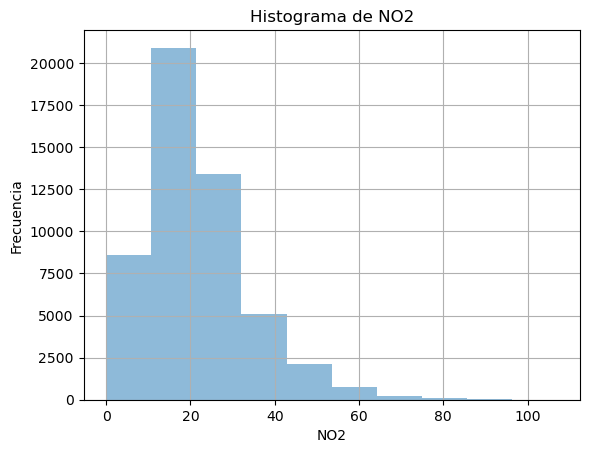

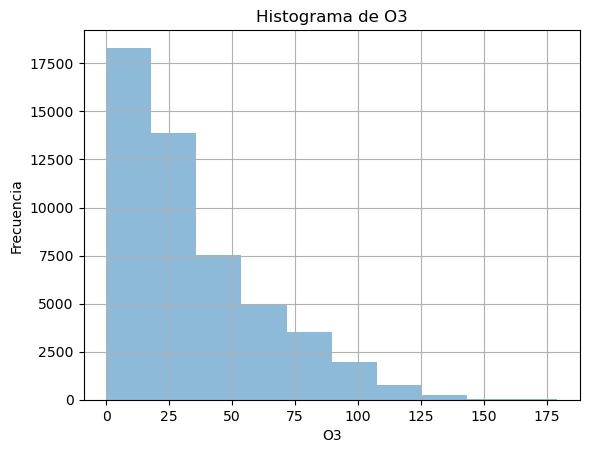

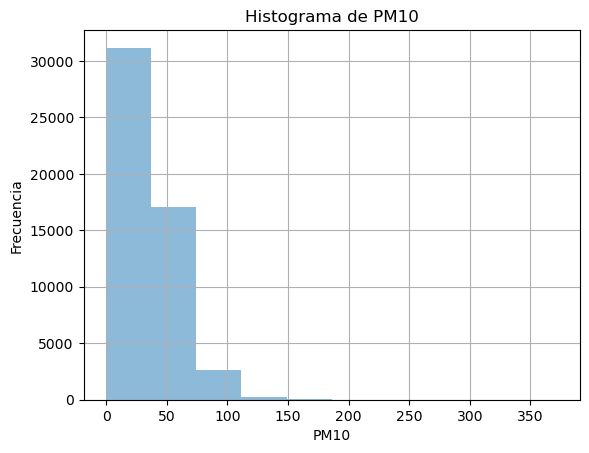

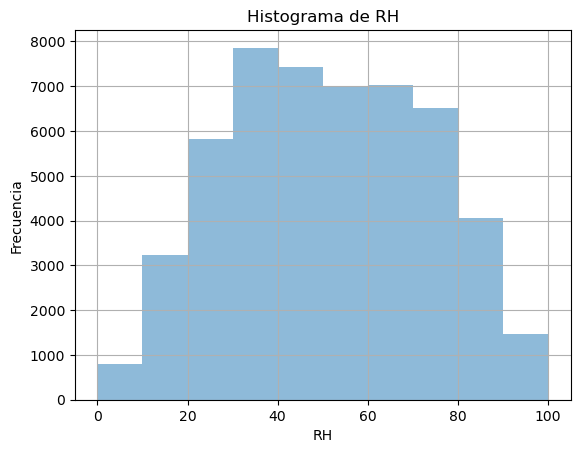

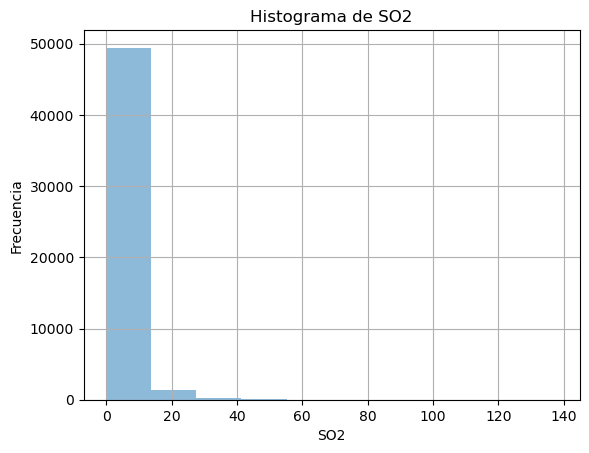

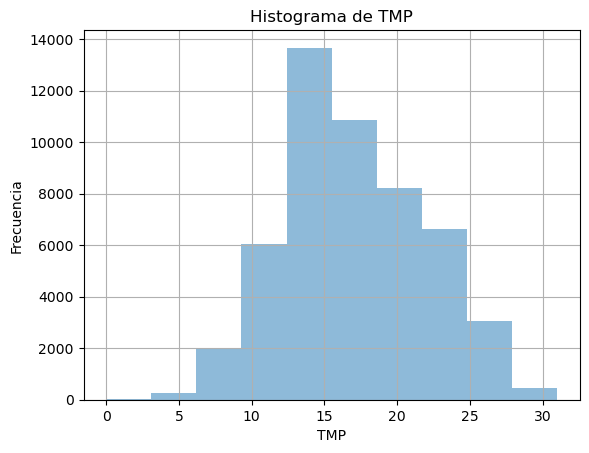

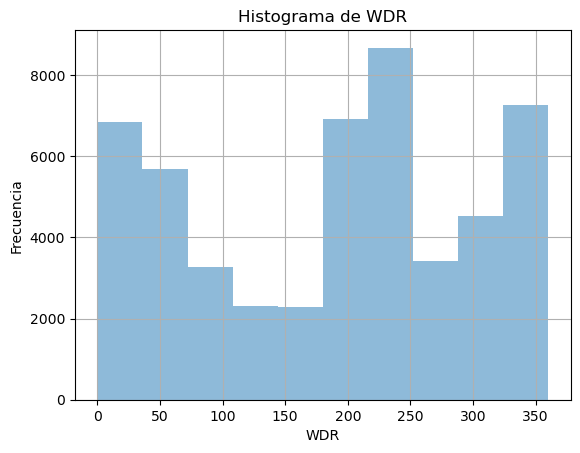

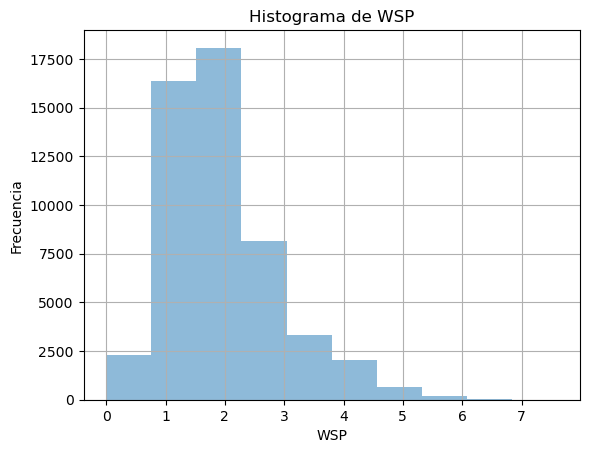

In [61]:
for column in df_variables.columns:
    plt.figure()
    df[column].plot(kind='hist', alpha=0.5)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
